In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
from torchvision import models, datasets
from torch.autograd import Variable

#from data_utils.data_setup import get_imagenet_test, get_top_prediction, get_imagenet_classes
from techniques.gen_patch import gen_adversarial_patch
from metrics.utils import *
from techniques.utils import get_displ_img
#from techniques.generate_grounding import gen_grounding

from techniques.generate_grounding import gen_grounding, gen_grounding_gcam, gen_grounding_gcam_batch

In [2]:
displ_img = cv2.imread('/work/lisabdunlap/explain-eval/data/samples/cat_dog.png')

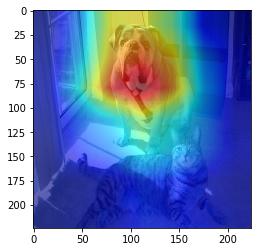

In [3]:
models = ['resnet18', 'resnet152', 'vgg19', 'vgg19_bn', 'inception_v3', 'densenet201']
masks = []
for m in models:
    masks.append(gen_grounding_gcam(displ_img, 'dog_cat', m, target_index=1, show=True, save=False, device=0))

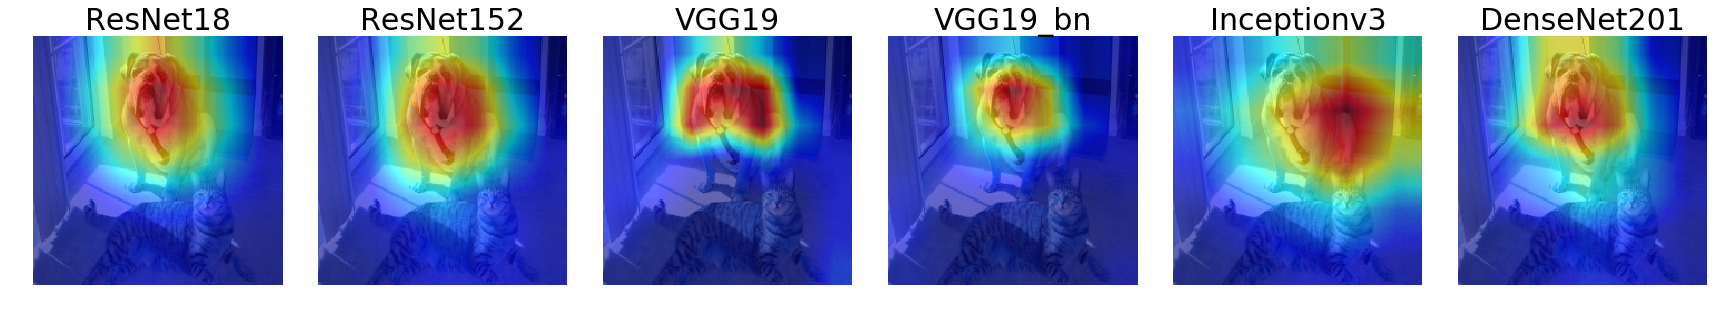

In [12]:
from mpl_toolkits.axes_grid1 import ImageGrid
def cam_on_img(result, img):
    heatmap = cv2.cvtColor(cv2.applyColorMap(np.uint8((result / np.max(result)) * 255.0), cv2.COLORMAP_JET),
                                 cv2.COLOR_RGB2BGR)
    alpha = .6
    #img = np.uint8(img*255)
    cam = heatmap*alpha + np.float32(img)*(1-alpha)
    cam /= np.max(cam)
    return cam

fig = plt.figure(figsize=(30,30))
#fig.patch.set_visible(False)
#plt.axis('off')
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 6),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )
i=0
models = ['ResNet18', 'ResNet152', 'VGG19', 'VGG19_bn', 'Inceptionv3', 'DenseNet201']
for ax, im in zip(grid, masks):
    # Iterating over the grid returns the Axes.
    ax.axis('off')
    ax.set_title(models[i], size=30)
    ax.imshow(cam_on_img(im, displ_img))
    i+=1

plt.show()